In [16]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px

In [17]:
# Ticker list to download
tickers = 'SPY QQQ TLT MSFT GOOG AMZN NFLX NVDA TSLA'

# Download data from Yahoo-Finance
data = yf.download(
    tickers = tickers,
    start="2020-01-01", # From what point do we want to start getting stock data
    end="2024-04-30", # From what point do we want to stop getting stock data
    interval = "1d", # The sample rate of the data one stock data every day
    ignore_tz=True,
    auto_adjust=True, # Adjust all fields by splits and dividends
)

data = data['Close']
# Specify the ticker we are going to look into 
ticker = 'SPY'
# Get the close data for our specific tickers
close_spy = data[[ticker]].copy()
close_spy.columns = ['close']
close_spy.head()

[*********************100%***********************]  9 of 9 completed


,close
Date,
2020-01-02,299.406525
2020-01-03,297.139221
2020-01-06,298.272827
2020-01-07,297.434174
2020-01-08,299.019409


In [18]:
close_spy['daily_change']=close_spy.pct_change(periods=1).fillna(0)
close_spy.head()

,close,daily_change
Date,,
2020-01-02,299.406525,0.000000
2020-01-03,297.139221,-0.007573
2020-01-06,298.272827,0.003815
2020-01-07,297.434174,-0.002812
2020-01-08,299.019409,0.005330


In [19]:
# Create our moving averages
close_spy["slow_ma"] = close_spy.close.rolling(window = 50).mean()
close_spy["fast_ma"] = close_spy.close.rolling(window = 10).mean()
# Remove the null values created at the start by not having enough values to calculate an average
#close_spy = close_spy[close_spy.notnull().all(1)]
close_spy = close_spy.dropna()
close_spy.head(10)

,close,daily_change,slow_ma,fast_ma
Date,,,,
2020-03-13,248.210541,0.085486,294.238013,265.108388
2020-03-16,221.050369,-0.109424,292.670890,258.727097
2020-03-17,232.985352,0.053992,291.387812,254.354932
2020-03-18,221.188675,-0.050633,289.846129,247.640019
2020-03-19,221.658646,0.002125,288.330619,241.930591
2020-03-20,212.106445,-0.043094,286.592360,235.726752
2020-03-23,206.683243,-0.025568,284.705086,231.121510
2020-03-24,225.409454,0.090603,283.209664,227.081111
2020-03-25,228.783844,0.014970,281.740440,224.673952


<Axes: xlabel='Date'>

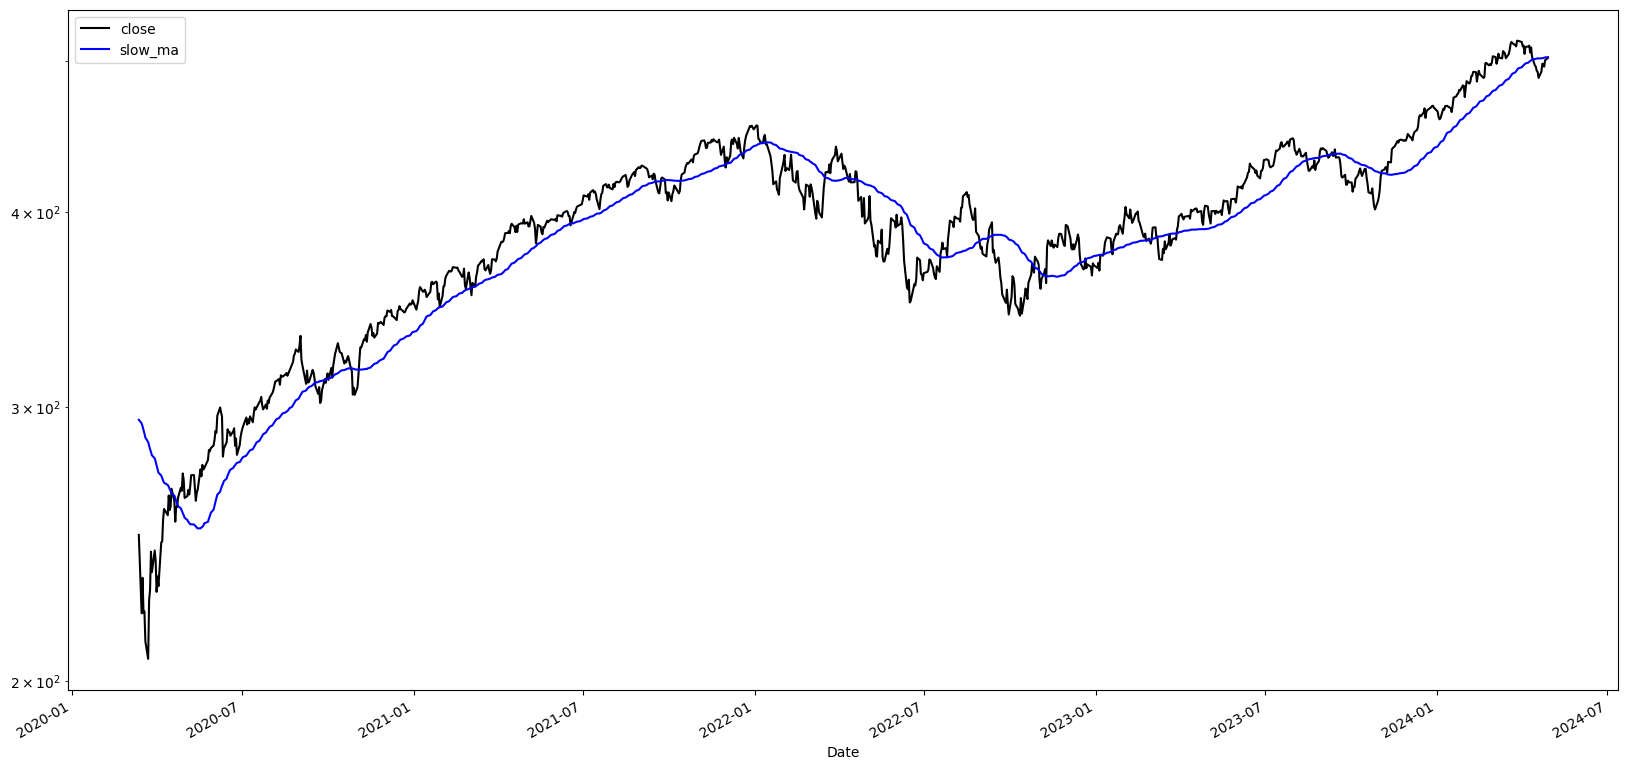

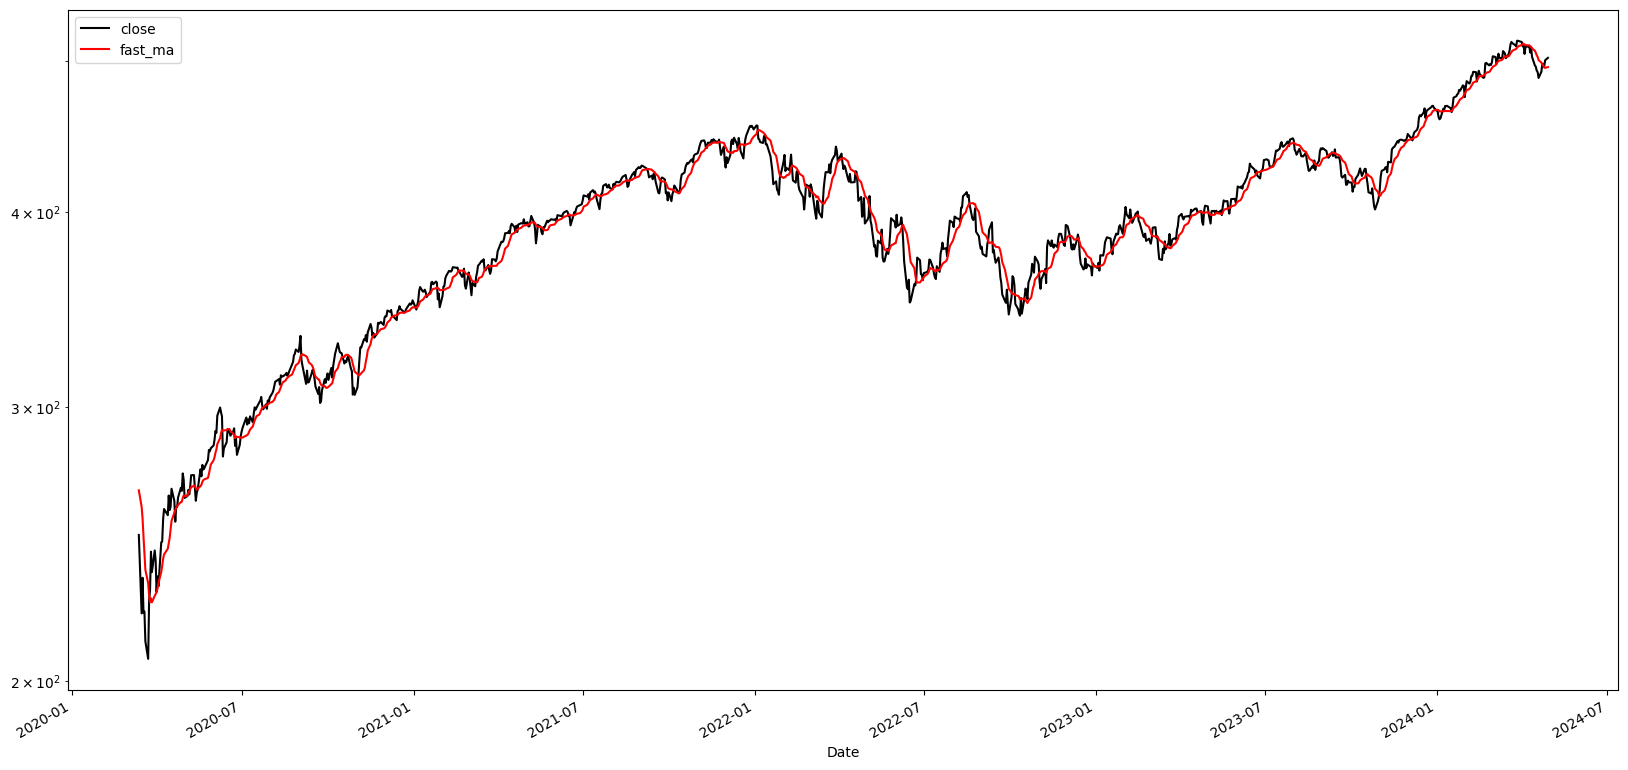

In [20]:
# Plot slow and fast vs close moving averages (MA)
close_spy[['close','slow_ma']].plot(logy=True, figsize = (20,10), color=['black','blue'])
close_spy[['close','fast_ma']].plot(logy=True, figsize = (20,10), color=['black','red'])

<Axes: xlabel='Date'>

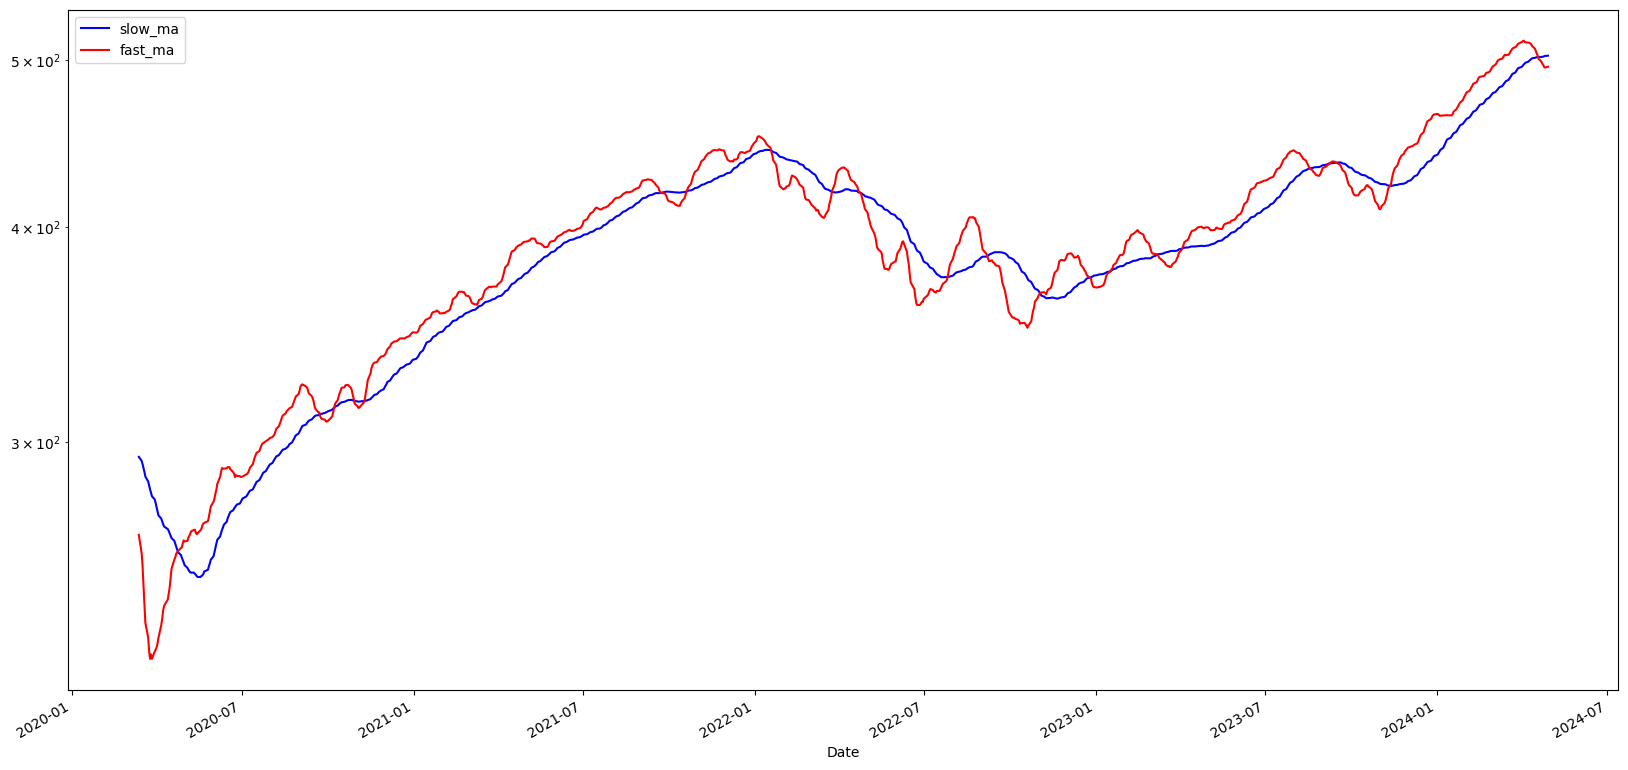

In [21]:
# Plot slow vs fast moving averages (MA)
close_spy[['slow_ma','fast_ma']].plot(logy=True, figsize = (20,10), color=['blue', 'red'])

<Axes: xlabel='Date'>

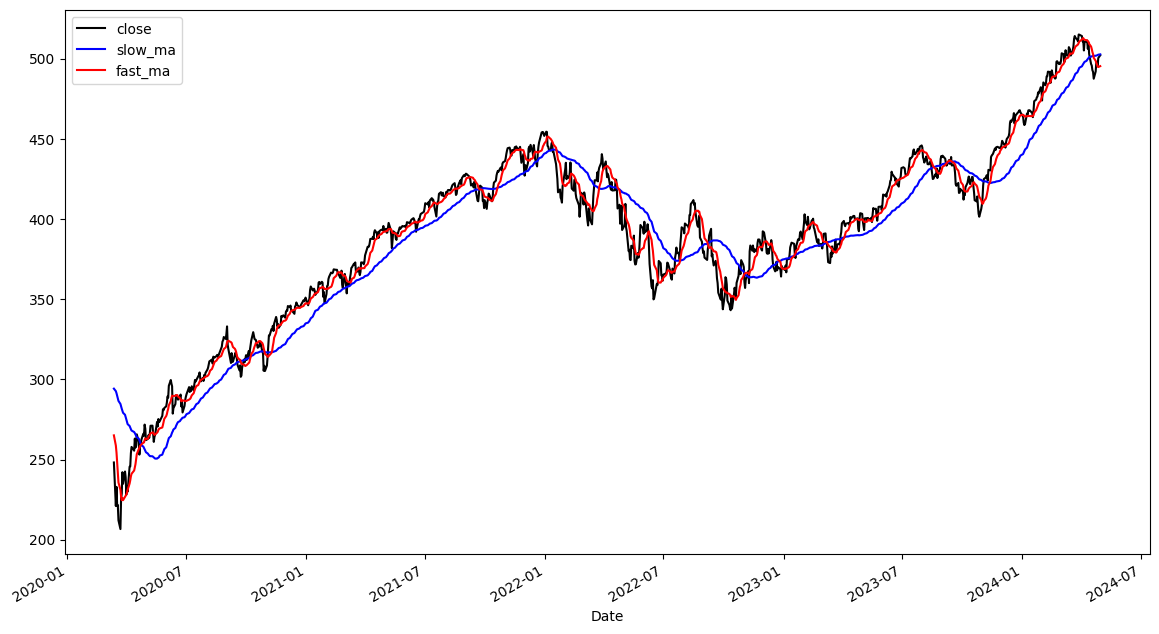

In [22]:
close_spy[['close','slow_ma', 'fast_ma']].plot(figsize = (14,8), color=['black', 'blue', 'red'])

Compute Signals

df = df.assign(new_col = some_function(df))

df = df.assign(new_col = lambda x: ...)


In [ ]:
# Buy the stock at any point where the fast MA is above the slow MA
close_spy = close_spy.assign(
    signal = lambda x: np.where(x.fast_ma > x.slow_ma, 1, 0)
)